# Justin Francis
TFES Sp 2020
Jan 15, 2020

### Figures

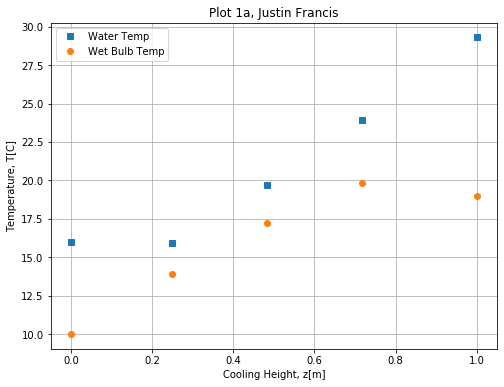

In [28]:
# Fig 1a
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Tw = np.array([16.0, 15.9, 19.7, 23.9, 29.3]) #C
Twb = np.array([10.0, 13.9, 17.2, 19.8, 19.0]) #C
x = np.array([0, 24.8, 48.3, 71.8, 100.0]) #cm
x = np.divide(x, 100) #m

#didn't work
# for i in range(len(Tw)):
#     approach = Twb[i]-10.0
#     rang = Tw[i]-16.0
#     plt.plot([x[i], x[i]], [rang, rang], label='Range')
#     plt.plot([x[i], x[i]], [approach, approach], label='Approach')

plt.figure(1, figsize=(8, 6))
plt.plot(x, Tw, 's', label='Water Temp')
plt.plot(x, Twb, 'o', label='Wet Bulb Temp')

plt.xlabel('Cooling Height, z[m]')
plt.ylabel('Temperature, T[C]')
plt.title('Plot 1a, Justin Francis')
plt.legend()
plt.grid()
plt.savefig('Fig1a.png', dpi=1200)
plt.show()


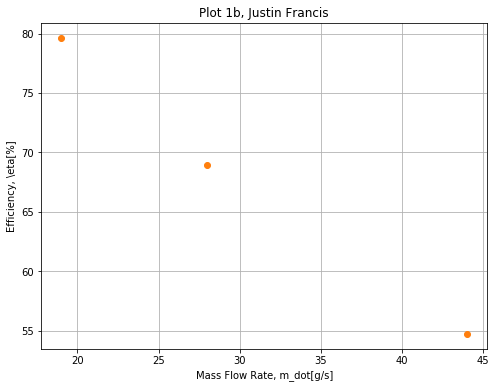

[68.9119171  79.66101695 54.71698113]


In [29]:
#Fig 1b
mdot_win = np.array([28.0, 19.0, 44.0]) #g/s
Twin = np.array([29.3, 33.9, 26.2]) #C
Twout = np.array([16.0, 15.1, 17.5]) #C
Twbin = np.array([10.0, 10.3, 10.3]) #C
eta = np.zeros([len(Twin),]) #%

for i in range(len(Twin)):
    Range = Twin[i] - Twout[i]
    approach = Twout[i] - Twbin[i]    
    eta[i] = (Range/(Range + approach)) * 100

plt.figure(2, figsize=(8, 6))
plt.plot(mdot_win, eta, 'o', color='tab:orange')
plt.ylabel('Efficiency, \eta[%]')
plt.xlabel('Mass Flow Rate, m_dot[g/s]')
plt.title('Plot 1b, Justin Francis')
plt.grid()
plt.savefig('Fig1b.png', dpi=1200)
plt.show()

print(eta)

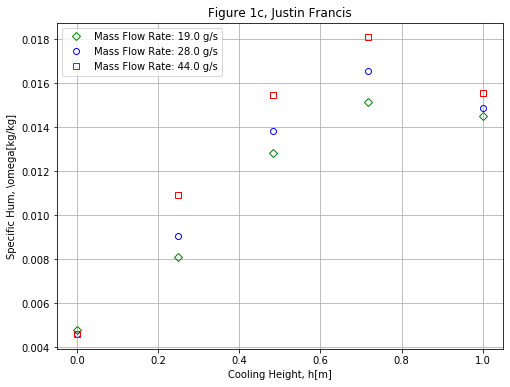

In [30]:
# Fig 1c

# See .py for psychromatic function, couldn't figure out how to set up conda .venv
spec_hum = np.array([[0.00459953, 0.00905885, 0.01380968, 0.01654745, 0.01487132],
 [0.00477874, 0.00811048, 0.01280783, 0.01512792, 0.01449206],
 [0.0046177, 0.01092151, 0.01544729, 0.01808167, 0.01556358]])

plt.figure(3, figsize=(8, 6))
plt.plot(x, spec_hum[1,:], 'D', color='g', label='Mass Flow Rate: 19.0 g/s', fillstyle='none')
plt.plot(x, spec_hum[0,:], 'o', color='b', label='Mass Flow Rate: 28.0 g/s', fillstyle='none')
plt.plot(x, spec_hum[2,:], 's', color='r', label='Mass Flow Rate: 44.0 g/s', fillstyle='none')
plt.title('Figure 1c, Justin Francis')
plt.ylabel('Specific Hum, \omega[kg/kg]')
plt.xlabel('Cooling Height, h[m]')
plt.legend()
plt.grid()
plt.savefig('Fig1c.png', dpi=1200)
plt.show()

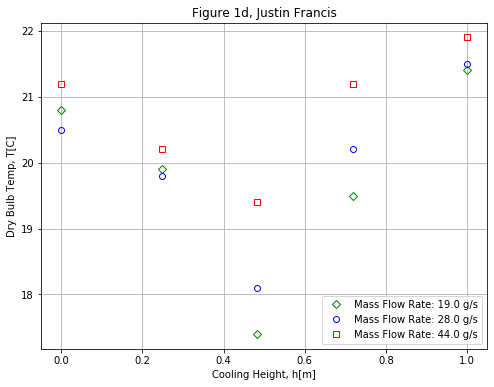

In [31]:
#Fig 1d
Tdb = np.array([[20.5, 19.8, 18.1, 20.2, 21.5], [20.8, 19.9, 17.4, 19.5, 21.4], [21.2, 20.2, 19.4, 21.2, 21.9]])

plt.figure(4, figsize=(8, 6))
plt.plot(x, Tdb[1,:], 'D', color='g', label='Mass Flow Rate: 19.0 g/s', fillstyle='none')
plt.plot(x, Tdb[0,:], 'o', color='b', label='Mass Flow Rate: 28.0 g/s', fillstyle='none')
plt.plot(x, Tdb[2,:], 's', color='r', label='Mass Flow Rate: 44.0 g/s', fillstyle='none')
plt.title('Figure 1d, Justin Francis')
plt.ylabel('Dry Bulb Temp, T[C]')
plt.xlabel('Cooling Height, h[m]')
plt.legend(loc='lower right')
plt.grid()
plt.savefig('Fig1d.png', dpi=1200)
plt.show()

[[0.62660677 0.63064939 0.75192812]]


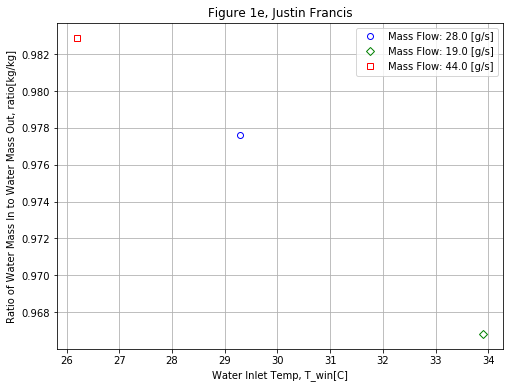

In [32]:
# Fig 1e

# See .py for psychromatic function, couldn't figure out how to set up conda .venv
v_a = np.array([[0.97056498, 0.96825136, 0.96263256, 0.96957343, 0.97387016],
 [0.97155653, 0.96858187, 0.96031893, 0.9672598, 0.97353964],
 [0.9728786, 0.96957343, 0.96692929, 0.9728786,  0.97519223]])
mdot_win = np.array([28,19,44]) #g/s
dP = 10 #mm H20
omega = spec_hum
mdot_a = np.zeros([Tdb.shape[0],])
mdot_vin = omega[0,0]*0.0137*(dP/((1+omega[0,0])*v_a[0,0]))**0.5
mdot_wout = np.zeros([Tdb.shape[0],])
mdot_makeup = np.array([((7**2)*np.pi/4*(2.54/2)/78, ((7**2)*np.pi/4*2.54)/155, ((7**2)*np.pi/4*2.54)/130)])
mdot_wout = mdot_win-mdot_makeup


for i in range(Tdb.shape[0]):
    mdot_a[i] = 0.0137*(dP/((1+omega[i,-1])*v_a[i,-1]))**0.5 #0.0137*sqrt(dP/((1+w)*va))
#didn't work
#     mdot_vout = omega[i,-1] * mdot_a[i]
#     mdot_wout[i] = mdot_win[i] + mdot_vin - mdot_vout

print(mdot_makeup)

y = mdot_wout/mdot_win
y = y.reshape(3,)

        
plt.figure(5, figsize=(8, 6))
plt.plot(Twin[0], y[0], 'o', color='b', fillstyle='none')
plt.plot(Twin[1], y[1], 'D', color='g', fillstyle='none')
plt.plot(Twin[2], y[2], 's', color='r', fillstyle='none')
plt.title('Figure 1e, Justin Francis')
plt.ylabel('Ratio of Water Mass In to Water Mass Out, ratio[kg/kg]')
plt.xlabel('Water Inlet Temp, T_win[C]')
plt.legend(['Mass Flow: 28.0 [g/s]','Mass Flow: 19.0 [g/s]', 'Mass Flow: 44.0 [g/s]'])
plt.grid()
plt.savefig('Fig1e.png', dpi=1200)
plt.show()

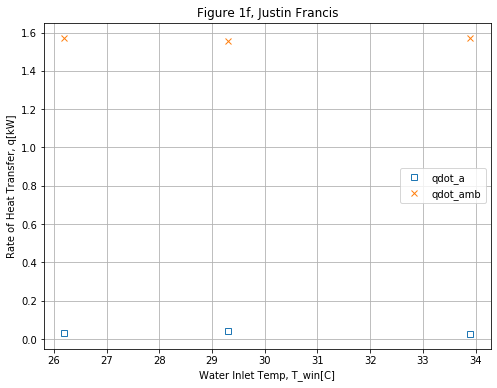

In [33]:
#Fig 1f
# See .py for psychromatic function, couldn't figure out how to set up conda .venv
h_a = np.array([[20623.0, 21629.0], [20924.8, 21528.399999999998], [21327.2, 22031.399999999998]]) #idx 0 is in, 1 is out
qdot_a = np.zeros([3,])
qdot_amb = np.zeros([3,])
qin = 1.6

for i in range(3):
    qdot_a[i] = (mdot_a[i]*(h_a[i,1] - h_a[i,0]))/1e3
    qdot_amb[i] = qin - qdot_a[i]

plt.figure(6, figsize=(8, 6))
plt.plot(Twin, qdot_a, 's', label='qdot_a', fillstyle='none')
plt.plot(Twin, qdot_amb, 'x', label='qdot_amb')
plt.title('Figure 1f, Justin Francis')
plt.ylabel('Rate of Heat Transfer, q[kW]')
plt.xlabel('Water Inlet Temp, T_win[C]')
plt.legend()
plt.grid()
plt.savefig('Fig1f.png', dpi=1200)
plt.show()


